In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fmin

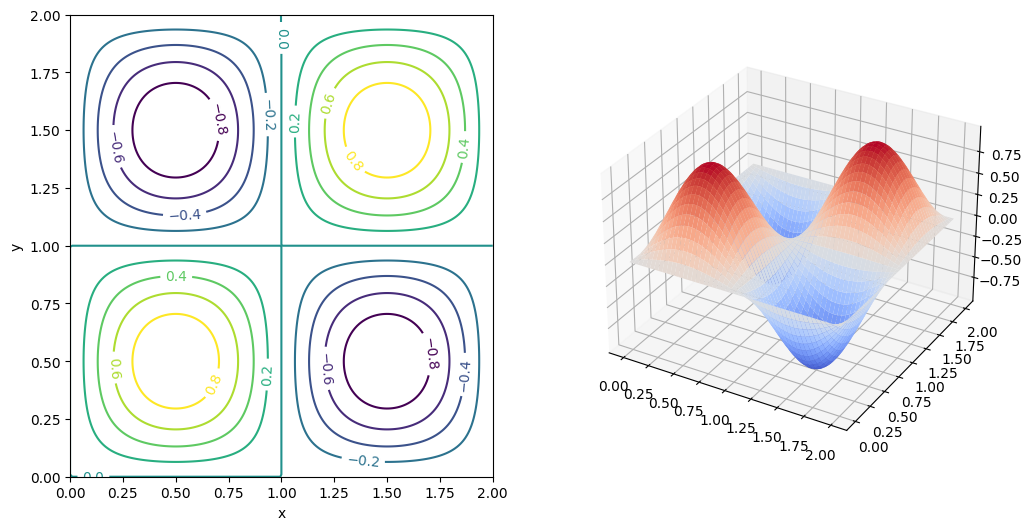

In [2]:
x = np.linspace(0, 2, 200)
y = np.linspace(0, 2, 200)

X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi * X) * np.sin(np.pi * Y)

fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(121)
cs = ax1.contour(X, Y, Z, levels=np.linspace(-0.8, 0.8, 9))
ax1.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlabel('x'); plt.ylabel('y')

ax2 = fig.add_subplot(122, projection = "3d")
ax2.plot_surface(X, Y, Z, cmap = "coolwarm")
plt.show()


In [3]:
def f(t):
    x, y = t
    return np.sin(np.pi * x) * np.sin(np.pi * y)

minimum = fmin(f, [1, 1], xtol = 1e-9, disp = False)
print(f"Point of minimum : {minimum}")
minimum = fmin(f, [1, 1], xtol = 1e-9, disp = False, full_output = True)
print(f"Point of minimum : {minimum[0]} | Value : {minimum[1]}")

Point of minimum : [1.5 0.5]
Point of minimum : [1.5 0.5] | Value : -1.0


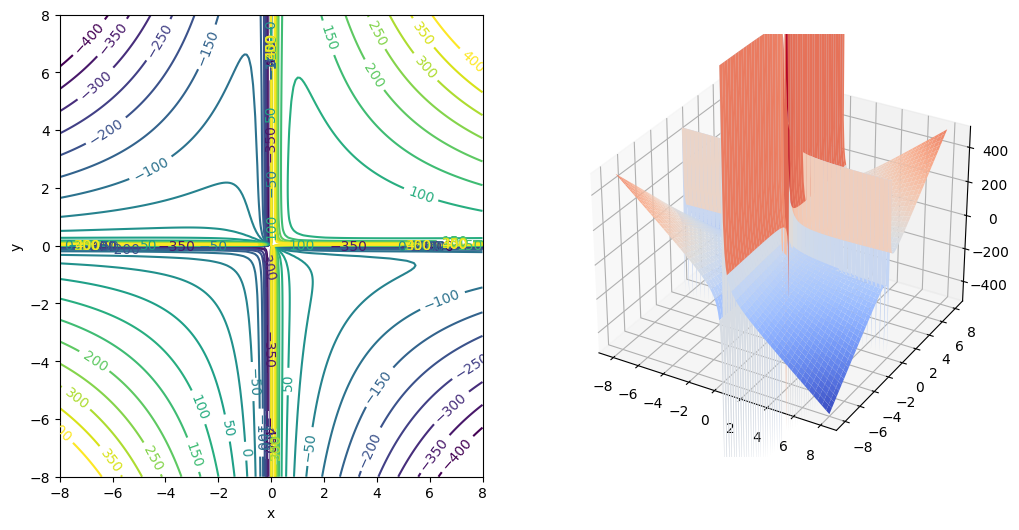

Point of minimum : [2.50000003 0.99999999] | Value : 60.0
Point of minimum : [-2.96355297e-30  1.88338855e+00] | Value : -1.6871640375222113e+31
Point of minimum : [-2.96355297e-30 -1.16661145e+00] | Value : -1.6871640375222113e+31
Point of minimum : [ 1.88338855e+00 -2.96355297e-30] | Value : -6.748656150088846e+30


In [4]:
# УПРАЖНЕНИЕ 1
x = np.linspace(-8, 8, 200)
y = np.linspace(-8, 8, 200)

X, Y = np.meshgrid(x, y)
Z = 8*X*Y + 50/X + 20/Y
 
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(121)
cs = ax1.contour(X, Y, Z, levels=np.linspace(-400, 400, 17))
ax1.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlabel('x'); plt.ylabel('y')

ax2 = fig.add_subplot(122, projection = "3d")
ax2.plot_surface(X, Y, Z, cmap = "coolwarm")
ax2.set_zlim(zmin = -500, zmax = 500)
plt.show()

def f(t):
    x, y = t
    return 8*x*y + 50/x + 20/y

minimum = fmin(f, [1, 1], xtol = 1e-9, disp = False, full_output = True)
print(f"Point of minimum : {minimum[0]} | Value : {minimum[1]}")

minimum = fmin(f, [-1, 1], xtol = 1e-9, disp = False, full_output = True)
print(f"Point of minimum : {minimum[0]} | Value : {minimum[1]}")

minimum = fmin(f, [-1, -1], xtol = 1e-9, disp = False, full_output = True)
print(f"Point of minimum : {minimum[0]} | Value : {minimum[1]}")

minimum = fmin(f, [1, -1], xtol = 1e-9, disp = False, full_output = True)
print(f"Point of minimum : {minimum[0]} | Value : {minimum[1]}")


In [5]:
# УПРАЖНЕНИЕ 2
x, y = sp.symbols("x y")
f = x**2 + x * y**3 + 3*y

def find_derivatives(f, x0, y0):
    variables = [x, y]
    for i in variables:
        der = sp.diff(f,i,1)
        print("Значение первой производной по", i, "  :", der.subs({x:x0, y: y0}))
        for j in variables:
            print("Значение второй производной по", i, j, ":", sp.diff(der, j, 1).subs({x:x0, y: y0}))

In [6]:
# УПРАЖНЕНИЕ 3
x, y = sp.symbols("x y")
z = x**2 + y**2 - 2*sp.log(x) - 18*sp.log(y)

def z_func(t):
    x, y = t
    return x**2 + y**2 - 2*np.log(x) - 18*np.log(y)

minimum = fmin(z_func, [3, 6], xtol = 1e-9, disp = False, full_output = True)
print(f"Point of minimum : {minimum[0]} | Value : {minimum[1]}")
x_min, y_min = minimum[0][0], minimum[0][1]

find_derivatives(z, 1, 3)
# for item in minors(z):
#     sp.pprint(item.subs([ (x, 1), (y, 3) ]))
#     print("--------")
# if (minors(z)[1].subs([ (x, 1), (y, 3) ]) > 0 and minors(z)[2].subs([ (x, 1), (y, 3) ]) > 0):
#     print("Minimum")
# if (minors(z)[1].subs([ (x, 1), (y, 3) ]) < 0 and minors(z)[2].subs([ (x, 1), (y, 3) ]) > 0):
#     print("Maximum")

Point of minimum : [1.00000001 3.        ] | Value : -9.775021196025977
Значение первой производной по x   : 0
Значение второй производной по x x : 4
Значение второй производной по x y : 0
Значение первой производной по y   : 0
Значение второй производной по y x : 0
Значение второй производной по y y : 4


In [7]:
x, y, z = sp.symbols("x y z")
df1 = x - z
df2 = x - y
df3 = x + z 
solution = sp.solve([df1, df2, df3])
print(solution)

print("--------------")

s = sp.solve([x**2 + y**2 - 1, x - y, z - y])
print(s[0])
print(s[1])
print('x:', [sp.N(s[0][x]), sp.N(s[1][x])])

{x: 0, y: 0, z: 0}
--------------
{x: -sqrt(2)/2, y: -sqrt(2)/2, z: -sqrt(2)/2}
{x: sqrt(2)/2, y: sqrt(2)/2, z: sqrt(2)/2}
x: [-0.707106781186548, 0.707106781186548]


In [26]:
# УПРАЖНЕНИЕ 4

def stationary_point(f):
    x, y, z = sp.symbols("x y z")
    derivatives = [f.diff(variable) for variable in [x, y, z]]
    solutions = sp.solve(derivatives, [x, y, z])
    stationary_points = []

    for point in solutions:
        x0, y0, z0 = point[0], point[1], point[2]
        print(x0, y0, z0)
        diff_matrix = sp.Matrix([[sp.diff(derivatives[i], var) for var in [x, y, z]] for i in range(3)])
        
        matrix_values = diff_matrix.subs({x:x0 , y:y0, z:z0})

        signs = []
        for item in matrix_values.eigenvals():
            signs.append(np.sign(complex(item).real))

        if (signs == [1, 1, 1]) or (signs == [-1, 1, -1]):
        # if (signs == [1, 1, 1]) or (signs == [-1, -1, -1]):
            stationary_points.append([x0, y0, z0])
    return stationary_points

x, y, z = sp.symbols("x y z")
# f = (5*x*y + 2*x*z**2 + 3*y**2*z) / (x * y * z) + x + 1 
f = x + y/(2*x) + z / (3*y) + 5 / z
answers = stationary_point(f)
for answer in answers:
    print(f"x : {answer[0].evalf()}, y : {answer[1].evalf()}, z : {answer[2].evalf()}")

-1080**(1/4)/6 sqrt(30)/3 -750**(1/4)
1080**(1/4)/6 sqrt(30)/3 750**(1/4)
-1080**(1/4)*I/6 -sqrt(30)/3 750**(1/4)*I
1080**(1/4)*I/6 -sqrt(30)/3 -750**(1/4)*I
x : 0.955442792204367, y : 1.82574185835055, z : 5.23317569696053
